In [1]:
import skbeam.core.roi as roi
import numpy as np
from matplotlib import pyplot as plt
import pyCHX.Two_Time_Correlation_Function as corr2t

/home/abarbour/conda_envs/csx-s2-pyCHX/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


## Two_Time_Correlation_Functions.py
### auto_two_Array()

In [2]:
labeled_array = np.zeros((8,8))
labeled_array[2:5,2:5] = np.int(2)
labeled_array[7:8,2:5] = np.int(1)

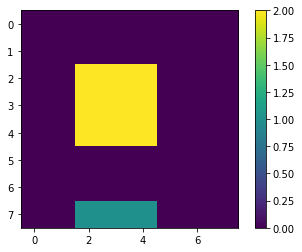

In [3]:
plt.figure()
im = plt.imshow(labeled_array)
plt.colorbar(im)

In [4]:
qind, pixelist = roi.extract_label_indices(labeled_array)
qind = qind.astype(int)
print(qind, pixelist)

[2 2 2 2 2 2 2 2 2 1 1 1] [18 19 20 26 27 28 34 35 36 58 59 60]


In [7]:
noqs = len( np.unique(qind) )
nopr = np.bincount(qind, minlength=(noqs+1))[1:]
print(noqs)
print(nopr,'\t ---> original method\n')
nopr = np.bincount(qind)
print(nopr,'\n')
nopr = np.bincount(qind, minlength=(noqs))
print(nopr,'\n')
nopr = np.bincount(qind)[1:]
print(nopr,'\t ---> switch to this method\n')


2
[3 9] 	 ---> original method

[0 3 9] 

[0 3 9] 

[3 9] 	 ---> switch to this method



## Two_Time_Correlation_Functions.py
### get_one_time_from_two_time_old()
### get_one_time_from_two_time()

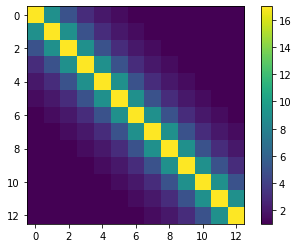

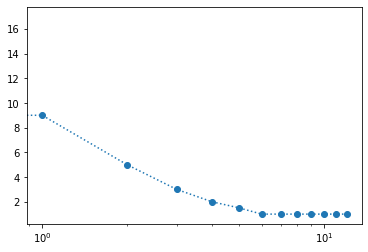

In [8]:
fake_g2_tt = np.array([[16, 8, 4, 2, 1, 0.5, 0, 0, 0, 0, 0, 0, 0],
                       [8, 16, 8, 4, 2, 1, 0.5, 0, 0, 0, 0, 0, 0],
                       [4, 8, 16, 8, 4, 2, 1, 0.5, 0, 0, 0, 0, 0],
                       [2, 4, 8, 16, 8, 4, 2, 1, 0.5, 0, 0, 0, 0],
                       [1, 2, 4, 8, 16, 8, 4, 2, 1, 0.5, 0, 0, 0],
                       [0.5, 1, 2, 4, 8, 16, 8, 4, 2, 1, 0.5, 0, 0],
                       [0, 0.5, 1, 2, 4, 8, 16, 8, 4, 2, 1, 0.5, 0],#
                       [0, 0, 0.5, 1, 2, 4, 8, 16, 8, 4, 2, 1, 0.5],
                       [0, 0, 0, 0.5, 1, 2, 4, 8, 16, 8, 4, 2, 1],
                       [0, 0, 0, 0, 0.5, 1, 2, 4, 8, 16, 8, 4, 2],
                       [0, 0, 0, 0, 0, 0.5, 1, 2, 4, 8, 16, 8, 4],
                       [0, 0, 0, 0, 0, 0, 0.5, 1, 2, 4, 8, 16, 8],
                       [0, 0, 0, 0, 0, 0, 0, 0.5, 1, 2, 4, 8, 16],
                      ])+1

#fake_g2_tt = np.reshape(fake_g2_tt,(1,fake_g2_tt.shape[0],fake_g2_tt.shape[1]))


fake_g2_tt = np.stack((fake_g2_tt,fake_g2_tt))
fake_g2 = np.array([ fake_g2_tt[i,0,:] for i in range(fake_g2_tt.shape[0])])

plt.figure()
im=plt.imshow(fake_g2_tt[0])
plt.colorbar(im)


plt.figure()
plt.semilogx(np.arange(fake_g2.shape[1]),fake_g2[0],'o:')


1t from 2t with shape (2, 13) based on g2_tt with  (2, 13, 13)
1t from 2t with shape (13, 2) based on g2_tt with  (13, 13, 2)


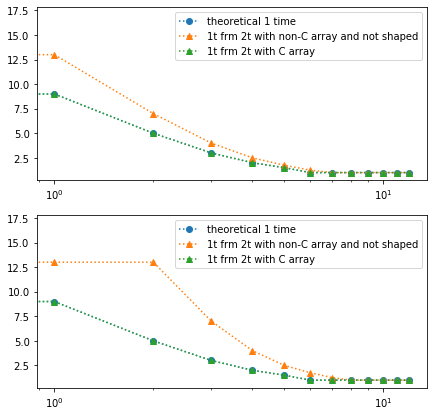

In [9]:
##%%timeit
onetime_1NN_shape = corr2t.get_one_time_from_two_time_old(fake_g2_tt)
print('1t from 2t with shape',onetime_1NN_shape.shape, 'based on g2_tt with ', fake_g2_tt.shape)

fake_g2_tt_c_ar = fake_g2_tt.T

onetime_NN1_shape = corr2t.get_one_time_from_two_time_old(fake_g2_tt_c_ar)
print('1t from 2t with shape', onetime_NN1_shape.shape, 'based on g2_tt with ', fake_g2_tt_c_ar.shape)

fig, axes = plt.subplots(fake_g2.shape[0], figsize=(7,7))
for ax, f_g2, tt_g2_fshape, tt_g2_cshape in zip(axes, fake_g2, onetime_1NN_shape, onetime_NN1_shape.T):
    ax.semilogx(np.arange(fake_g2.shape[1]),f_g2,'o:', label='theoretical 1 time')
    ax.semilogx(np.arange(onetime_1NN_shape.shape[1]),tt_g2_fshape,'^:', label='1t frm 2t with non-C array and not shaped')
    ax.semilogx(np.arange(onetime_NN1_shape.shape[0]),tt_g2_cshape,'^:', label='1t frm 2t with C array')
    ax.legend()

1t from 2t with shape (2, 13) based on g2_tt with  (2, 13, 13)
1t from 2t with shape (13, 2) based on g2_tt with  (13, 13, 2)


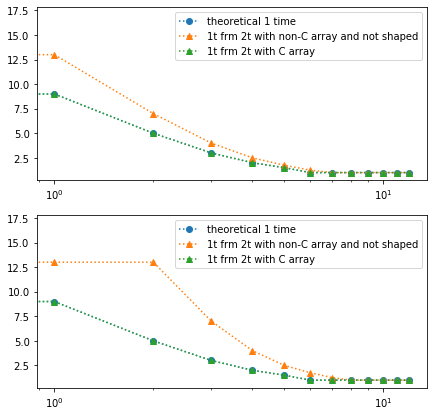

In [10]:
#%%timeit
onetime_1NN_shape = corr2t.get_one_time_from_two_time(fake_g2_tt)
print('1t from 2t with shape',onetime_1NN_shape.shape, 'based on g2_tt with ', fake_g2_tt.shape)

fake_g2_tt_c_ar = fake_g2_tt.T

onetime_NN1_shape = corr2t.get_one_time_from_two_time(fake_g2_tt_c_ar)
print('1t from 2t with shape', onetime_NN1_shape.shape, 'based on g2_tt with ', fake_g2_tt_c_ar.shape)

fig, axes = plt.subplots(fake_g2.shape[0], figsize=(7,7))
for ax, f_g2, tt_g2_fshape, tt_g2_cshape in zip(axes, fake_g2, onetime_1NN_shape, onetime_NN1_shape.T):
    ax.semilogx(np.arange(fake_g2.shape[1]),f_g2,'o:', label='theoretical 1 time')
    ax.semilogx(np.arange(onetime_1NN_shape.shape[1]),tt_g2_fshape,'^:', label='1t frm 2t with non-C array and not shaped')
    ax.semilogx(np.arange(onetime_NN1_shape.shape[0]),tt_g2_cshape,'^:', label='1t frm 2t with C array')
    ax.legend()


`get_one_time_from_two_time_old()` 
40 ms ± 2.46 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

`get_one_time_from_two_time()`
43.5 ms ± 3.48 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

| I / O | names | shapes   |
|-------|-------|----------|
|input  | **two-time**, norms, nopr| **(N,N, rois)** , (N, rois).shape ,  rois.shape |
|output | one-time from two-time | (N, rois)|

To Sort Later:
* why can use use a c-ordered array as required, but works with f-ordered array
* it looks like it gives results that are progressively worse
* the non "old" is just more efficient extraction of 1time (no for loop)

New for CSX
* `norms` and `nopr`
* still need to test